Author: Nicolas Legrand <nicolas.legrand@cfin.au.dk>

In [ ]:
%%capture
! pip install git+https://github.com/LegrandNico/metadPy.git

In [1]:
import numpy as np
import pandas as pd
from metadPy.mle import metad
from metadPy import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Fitting at the subject level

## From response-signal arrays

In [2]:
# Create responses data
nR_S1 = np.array([52, 32, 35, 37, 26, 12, 4, 2])
nR_S2 = np.array([2, 5, 15, 22, 33, 38, 40, 45])

In [3]:
output = metad(nR_S1=nR_S1, nR_S2=nR_S2)

Fitting model on subject: Subject 1:   0%|                                                       | 0/1 [00:00<?, ?it/s]

Estimate meta-d' using maximum likelihood estimation (MLE).
- n Subjects: 1
- n Conditions: 1
- n Groups: 1
... Using padding to avoid fitting errors.


Fitting model on subject: Subject 1: 100%|███████████████████████████████████████████████| 1/1 [00:01<00:00,  1.60s/it]


## From a dataframe

In [4]:
df = load_dataset("rm")

In [5]:
output = metad(nR_S1=nR_S1, nR_S2=nR_S2)

Fitting model on subject: Subject 1:   0%|                                                       | 0/1 [00:00<?, ?it/s]

Estimate meta-d' using maximum likelihood estimation (MLE).
- n Subjects: 1
- n Conditions: 1
- n Groups: 1
... Using padding to avoid fitting errors.


Fitting model on subject: Subject 1: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00,  4.23it/s]


# Fitting at the group level

## Using a list of response-signal arrays

## Using a dataframe

In [6]:
metacog_df = pd.read_csv("C:/Users/au646069/Downloads/metacognition_TrialData_master.csv")
metacog_df.head()

,subject,modality,trial,signal,response,accuracy,confidence,rt,rt_conf,contrast
0,1,memory,1,0.0,0.0,1,6.0,1.829698,2.685213,30.0
1,1,memory,2,1.0,1.0,1,4.0,4.080196,2.137347,30.0
2,1,memory,3,0.0,0.0,1,4.0,2.303110,2.801801,30.0
3,1,memory,4,0.0,0.0,1,5.0,2.715602,0.886483,30.0
4,1,memory,5,1.0,0.0,0,3.0,3.419934,1.665131,30.0


In [8]:
metacog_df = metacog_df[~metacog_df.confidence.isnull()]
metacog_df = metacog_df[~metacog_df.signal.isnull()]
metacog_df = metacog_df[~metacog_df.accuracy.isnull()]
metacog_df = metacog_df[~metacog_df.modality.isnull()]

metacog_df.signal.unique()

array([0., 1.])

In [21]:
group_fit = metad(
    data=metacog_df,
    nRatings=7,
    stimuli="signal",
    accuracy="accuracy",
    confidence="confidence",
    subject="subject",
    padding=True,
    within="modality"
)

Fitting model on subject: 1:   0%|                                                             | 0/322 [00:00<?, ?it/s]

Estimate meta-d' using maximum likelihood estimation (MLE).
- n Subjects: 322
- n Conditions: 4
- n Groups: 1
... Using padding to avoid fitting errors.


Fitting model on subject: 131:  39%|███████████████████▏                             | 126/322 [09:17<13:34,  4.15s/it]C:\ProgramData\Anaconda3\lib\site-packages\metadPy\mle.py:723: RuntimeWarning: divide by zero encountered in double_scalars
  guess.extend(list(t2c1 - (meta_d1 * (t1c1 / d1))))
C:\ProgramData\Anaconda3\lib\site-packages\metadPy\mle.py:723: RuntimeWarning: invalid value encountered in double_scalars
  guess.extend(list(t2c1 - (meta_d1 * (t1c1 / d1))))
C:\ProgramData\Anaconda3\lib\site-packages\metadPy\mle.py:557: UserWarning: Error when fitting data for subject 131 - Condition memory - Group Group 1. Returning NaNs as a result
  f"Error when fitting data for subject {str(sub)} - Condition {str(cond)} - Group {str(group)}. Returning NaNs as a result"
Fitting model on subject: 217:  66%|████████████████████████████████                 | 211/322 [15:33<09:33,  5.17s/it]C:\ProgramData\Anaconda3\lib\site-packages\metadPy\mle.py:557: UserWarning: Error when fitting data for s

In [22]:
group_fit.head()

,dprime,metad,m_ratio,m_diff,subject,modality
0,2.337905,2.447509,1.046881,0.109604,1,memory
0,1.140187,0.989047,0.867443,-0.151140,1,Calories
0,1.065441,1.649217,1.547920,0.583776,1,GDP
0,1.185403,0.876886,0.739737,-0.308517,1,vision
0,1.487794,1.066200,0.716631,-0.421594,2,memory


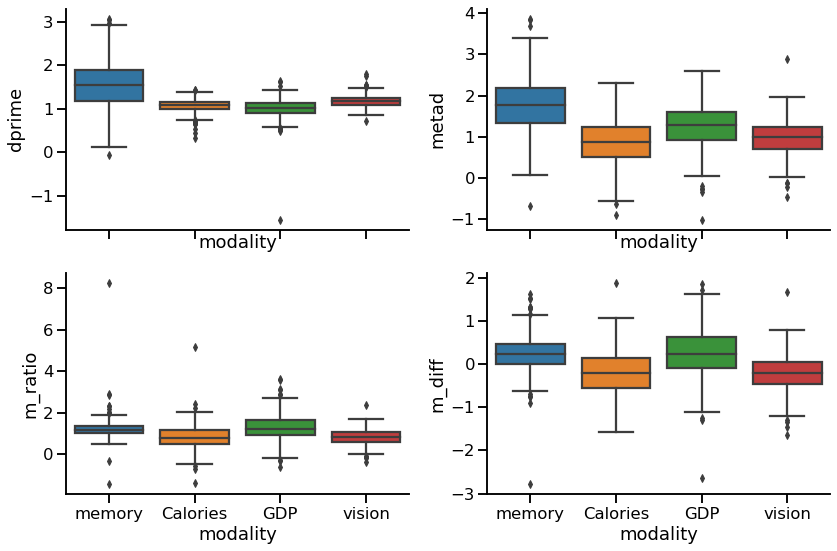

In [24]:
sns.set_context("talk")

_, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

sns.boxplot(data=group_fit, x="modality", y="dprime", ax=axs[0, 0])
#sns.stripplot(data=group_fit, x="modality", y="dprime", color="k", ax=axs[0, 0])

sns.boxplot(data=group_fit, x="modality", y="metad", ax=axs[0, 1])
sns.boxplot(data=group_fit, x="modality", y="m_ratio", ax=axs[1, 0])
sns.boxplot(data=group_fit, x="modality", y="m_diff", ax=axs[1, 1])

plt.tight_layout()
sns.despine()

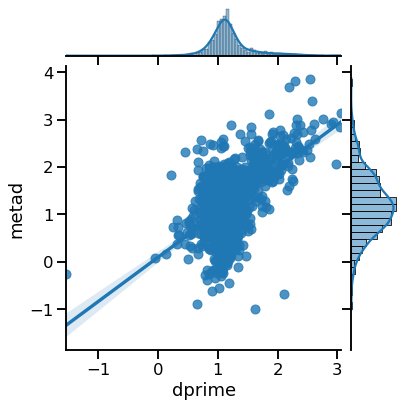

In [38]:
g = sns.jointplot(x="dprime", y="metad", data=group_fit,
                  kind="reg")